# Instructions 

- Make sure you’re logged into Kaggle.
- Load the **Video Game Sales dataset** (CSV file is provided in the Kaggle input section).  
- Carefully read through each step and run the cells in order.  
- Do **not** skip steps — each builds on the previous one.  
- Add your own observations wherever possible, especially when exploring graphs.  
- Remember: This is practice for real-world data preprocessing + EDA, so try to think *why* each step is done, not just *how*.  
- At the end, feel free to explore further — add more plots, groupbys, or questions you want to answer!  



Welcome to your next checkpoint on the Synapse road!
Today we’re diving into the Video Game Sales dataset to practice real-world data preprocessing + EDA. Think of this like prepping ingredients before cooking — we’ll clean, slice, and plate the data so insights pop 🍽️

We’ll be using pandas, numpy, matplotlib, and seaborn for this task.
Run the following cell to import them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Alright, now that we’ve got our tools ready, let’s bring in the star of the show — the **Video Game Sales dataset** 🎮  

Your task:  
- Load the dataset into a pandas DataFrame.  
- Take a quick peek at the first few rows using.  
- Check the shape of the dataset to see how big this universe is.  

Think of this step as unboxing a new console — gotta see what’s inside first!  


In [4]:
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [17]:
print(df.shape)

(16598, 11)


In [11]:
print(df['Platform'].unique())
print(df['Genre'].unique())
print(df['Publisher'].unique())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'

### 🕹️ Level 1: Meet the Characters  

Now that we’ve unboxed our dataset, let’s get to know the **cast of characters**:  
- What kinds of columns do we have? (numeric, object, etc.)  
- How many missing values are there?  

Your task:  
- To get a quick overview of column types + null values.  
- To double-check the data types.  

This step is like reading the **character bios** before starting a game   


In [13]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [14]:
df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


### 🎯 Level 2: Quick Stats Check (Describe the Data)  

Every good gamer checks the **stats screen** before playing  
Now, let’s do the same for our dataset:  

Your task:  
- To get summary statistics for numerical columns.  
- Notice things like average sales, max values, and distribution hints.  

This is like peeking at the **scoreboard** — who’s leading, what’s the high score?   


In [20]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## 🧹 Level 3: Clean the Map (Missing Values)

Time to sweep the floor before we play.

**Your tasks:**
- Check how many missing values are in each column.
- For this dataset, handle missing values in **`Year`** and **`Publisher`** by removing those rows.
- Re-check to confirm there are **no missing values left**.

> Tip: Do a quick sanity check after cleaning (row count should drop a bit).


In [25]:
print(df.isnull().sum())
df_cleaned = df.dropna(subset=['Year','Publisher'])

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
(16291, 11)


In [27]:
print("Original dataset shape : ",df.shape)
print("After cleaning shape : ",df_cleaned.shape)
print(df_cleaned.isnull().sum())

Original dataset shape :  (16598, 11)
After cleaning shape :  (16291, 11)
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


## 🔢 Level 4: Patch the `Year` Column (Data Types)

`Year` often shows up as a float (e.g., `2008.0`) because of missing values earlier.

**Your tasks:**
- Convert **`Year`** to **integer**.
- Re-run a quick `info` to confirm the dtype change.

> If conversion fails, revisit Level 3 — some NaNs may still be lurking.


In [30]:
df_cleaned['Year'] = df_cleaned['Year'].astype(int)
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB
None


/tmp/ipykernel_36/58779217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Year'].astype(int)



## 🎮 Level 5: Spotting the Legends  
Now that we’ve explored platforms and genres, let’s look at the **all-time best sellers**.  
Your task:  

List the **Top 5 best-selling video games**.  
We’ll display their **Name, Platform, Genre, and Global Sales**.  

Think of this as the **Hall of Fame of Video Games** 




In [34]:
top5_games = df_cleaned[['Name','Platform','Genre','Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(5)

print(top5_games)

                       Name Platform         Genre  Global_Sales
0                Wii Sports      Wii        Sports         82.74
1         Super Mario Bros.      NES      Platform         40.24
2            Mario Kart Wii      Wii        Racing         35.82
3         Wii Sports Resort      Wii        Sports         33.00
4  Pokemon Red/Pokemon Blue       GB  Role-Playing         31.37



## 🎮 Level 6: Which Console Ruled the Game?  
Every console/platform has a legacy — but which one released the **most number of games**?  

Count the number of games released on each platform.  
Create a **bar chart** to visualize it.  
Finally, answer: **Which platform has the highest number of releases?** 

  


Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


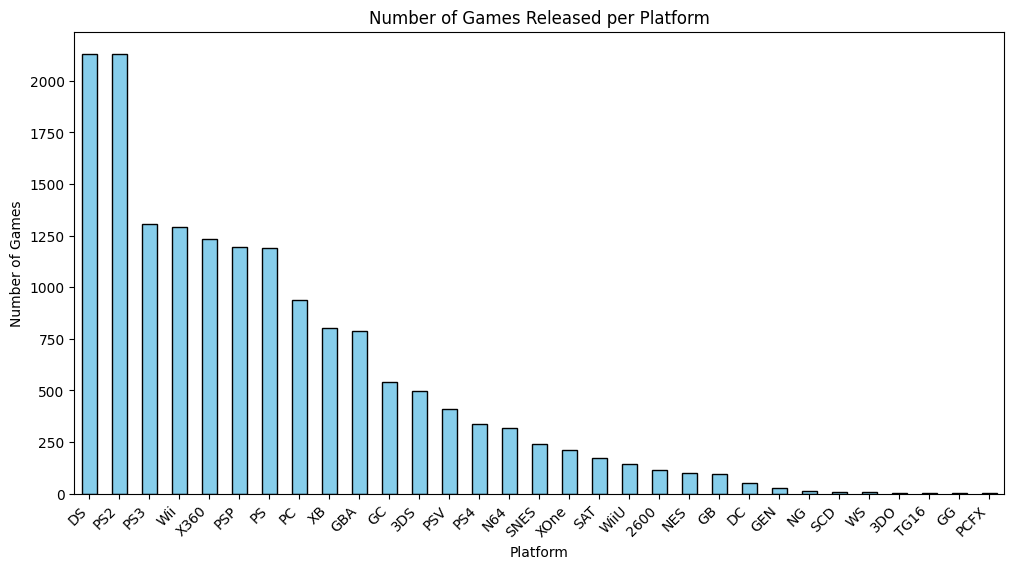

 The platform with the most releases is **DS** with 2131 games!


In [52]:
platform_counts = df_cleaned['Platform'].value_counts()
print(platform_counts)

plt.figure(figsize=(12,6))
platform_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Number of Games Released per Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.xticks(rotation=45, ha='right')

plt.show()

top_platform = platform_counts.idxmax()
top_count = platform_counts.max()

print(f" The platform with the most releases is **{top_platform}** with {top_count} games!")


## 🏢 Level 7: The Big Bosses (Top Publishers)  
Some publishers dominate the industry like final bosses 

Your task:  
- Find the **Top 5 publishers** with the highest **total Global Sales**.  
- Show their contribution using a **pie chart** 

This will help us see who really controlled the gaming world  


Publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
Name: Global_Sales, dtype: float64


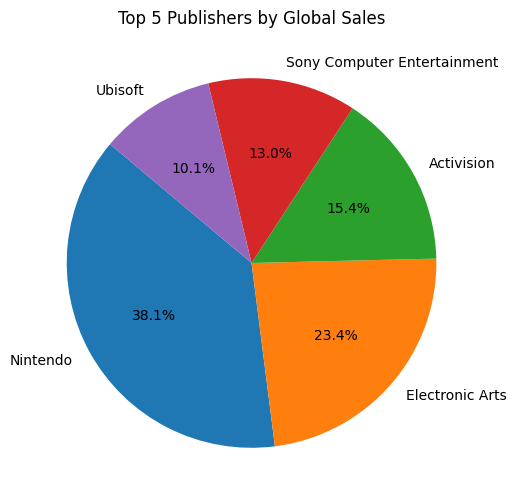

In [49]:
top_publishers = df_cleaned.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)
print(top_publishers)

plt.figure(figsize=(12,6))
plt.pie(top_publishers, labels=top_publishers.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Publishers by Global Sales")
plt.show()


## 🌍 Level 8: Genre Champions in Europe  
Different genres have their own kings in different regions.  
Let’s focus on **Europe (EU Sales)** for now.  

Your task:  
- For **each Genre**, find the **Publisher** that has the highest **total EU Sales**.  
- Print the results as a list (Genre → Top Publisher).  

Think of this as awarding the **regional championship belts**  



In [50]:
genre_publisher_sales = df_cleaned.groupby(['Genre','Publisher'])['EU_Sales'].sum().reset_index()
genre_champions = genre_publisher_sales.loc[genre_publisher_sales.groupby('Genre')['EU_Sales'].idxmax()]
for _, row in genre_champions.iterrows():
    print(f"{row['Genre']} -> {row['Publisher']}")

Action -> Take-Two Interactive
Adventure -> Ubisoft
Fighting -> THQ
Misc -> Nintendo
Platform -> Nintendo
Puzzle -> Nintendo
Racing -> Electronic Arts
Role-Playing -> Nintendo
Shooter -> Activision
Simulation -> Electronic Arts
Sports -> Electronic Arts
Strategy -> Activision



## 🎯 Level 9: Nintendo’s Golden Year  
Nintendo is one of the biggest names in gaming 🎮  
But… which year did Nintendo achieve its **highest total Global Sales**?  

Your task:  
- Filter the dataset for **Publisher = Nintendo**.  
- Group sales by year.  
- Find the year with the **highest global sales**.  

This is like uncovering the **peak of Nintendo’s power**   



In [51]:
nintendo_games = df_cleaned[df_cleaned['Publisher'] == 'Nintendo']
nintendo_sales_by_year = nintendo_games.groupby('Year')['Global_Sales'].sum()

golden_year = nintendo_sales_by_year.idxmax()
golden_sales = nintendo_sales_by_year.max()

print(f"Nintendo's golden year was {golden_year} with {golden_sales:.2f} million global sales.")


Nintendo's golden year was 2006 with 205.61 million global sales.



## 🏟️ Final Boss Arena: The Data Playground  

You’ve fought through all the levels ⚔️, now it’s time to explore on your own 🎉  

Your final mission:  
- Choose **any 2–3 plots** (your choice!) that show **interesting patterns** in the data.   

💡 This is your **creative zone** → Think of it as building your own “story” from the dataset.  

When you’re done, share your best plot with the team — let’s see who finds the coolest insight!  



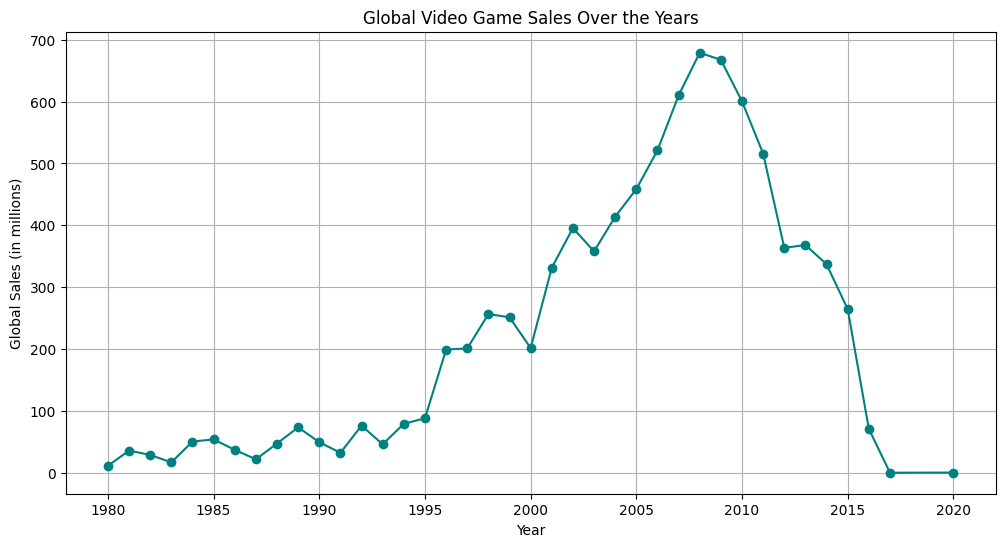

In [53]:
sales_by_year = df_cleaned.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-', color='teal')
plt.title("Global Video Game Sales Over the Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.grid(True)
plt.show()

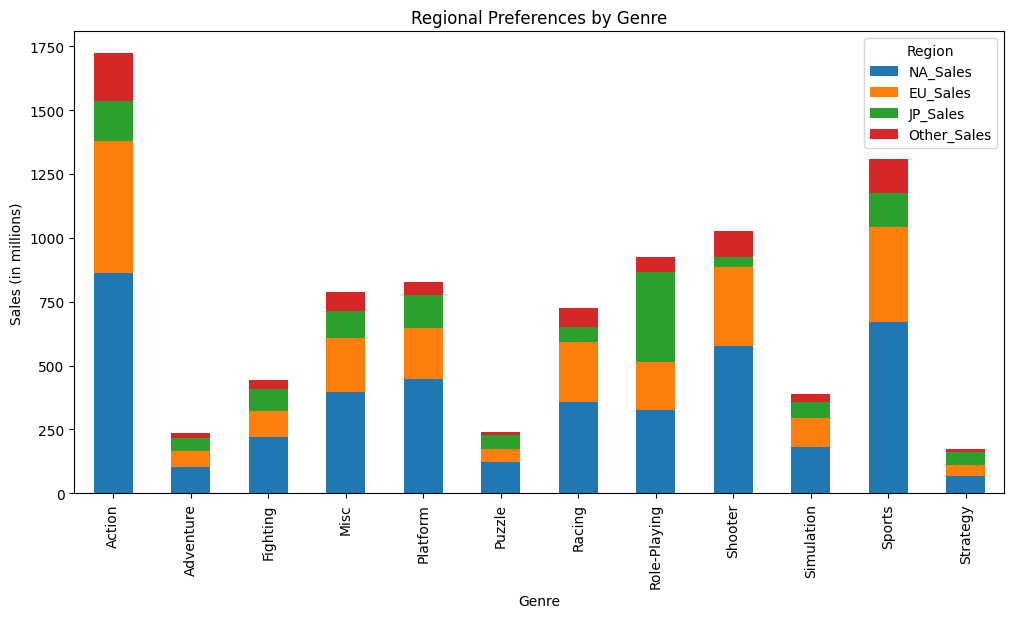

In [55]:
genre_sales = df_cleaned.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

genre_sales.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Regional Preferences by Genre")
plt.ylabel("Sales (in millions)")
plt.xlabel("Genre")
plt.legend(title="Region")
plt.show()